In [1]:
'''
:@Author: Remi
:@Date: 2023/10/26 10:36:41
:@LastEditors: Remi
:@LastEditTime: 2023/10/26 10:36:41
:Description: 
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler


In [2]:
data = pd.read_csv(r"D:\20240412\PLS\0412mean.csv",header=None).T
Y = data.values[1:,0].astype(float)
X = data.values[1:, 1:].astype(float)
wl = data.values[0, 1:].astype(float)


In [3]:
scaler = MinMaxScaler()
label_scaler = MinMaxScaler()

data = scaler.fit_transform(X.T)
label = label_scaler.fit_transform(Y.reshape(-1, 1))
data = data.T
# ######################## Plot the data
# print(len(wl))
# with plt.style.context('ggplot'):
#     plt.plot(wl, data[0,:])
#     plt.xlabel("Pixels")
#     plt.ylabel("Absorbance")
# plt.show()

In [16]:
def optimise_svr_cv(X, Y,degre):
    svr = SVR(kernel='rbf',degree = 7, C=1, epsilon=0,gamma = degre)
    r2 = []
    rmse = []
    mae = []
    Ypredict = []
    
    for test in range(len(Y)):
        X1 = np.delete(X,test,0)
        Y1 = np.delete(Y,test)
        svr.fit(X1,Y1)
        Ypredict.append(svr.predict(X[test].reshape(1, -1)).flatten())
        
    Y = Y
    Ypredict = np.array(Ypredict)
    r2 = r2_score(Y,Ypredict)
    rmse = np.sqrt(mean_squared_error(Y, Ypredict))
    mae = mean_absolute_error(Y, Ypredict)
    
    return (Ypredict, r2, rmse, mae)

Yp = []
label2 = []
# Create and fit the SVR model
for int in range(1,8):
    Ypredict, r2, rmse, mae = optimise_svr_cv(data, label,int)

    rmse = label_scaler.inverse_transform(np.array(rmse).reshape(1, -1))
    mae = label_scaler.inverse_transform(np.array(mae).reshape(1, -1))

    Yp.append(label_scaler.inverse_transform(np.array(Ypredict).reshape(1, -1)))
    label2.append(label_scaler.inverse_transform(label.reshape(1, -1)))
    print('r2 = ', np.mean(r2))
    print('rmse = ', np.mean(rmse))
    print('mae = ',np.mean(mae))


r2 =  0.776720012595322
rmse =  143.79157236685938
mae =  80.77944932680589
r2 =  0.7782172449554081
rmse =  143.34223963097992
mae =  86.9337758236727
r2 =  0.8168537823008943
rmse =  131.17215600636712
mae =  80.2227280007716
r2 =  0.8555420935885965
rmse =  117.6154228516329
mae =  73.63557555310362
r2 =  0.8785629996435105
rmse =  108.66869263095849
mae =  74.52815485418539
r2 =  0.8949309494968405
rmse =  101.77856479860512
mae =  72.67879940727886
r2 =  0.89082545872329
rmse =  103.5544707308928
mae =  75.26389254607061


In [17]:
Yp = np.array(Yp).reshape(1,-1)
label2 = np.array(label2).reshape(1,-1)

In [21]:
np.savetxt(r'D:\20240412\all_result' + '//' + 'svr_Y_predict.csv',np.vstack((Yp,label2)),delimiter=',',fmt='%s')

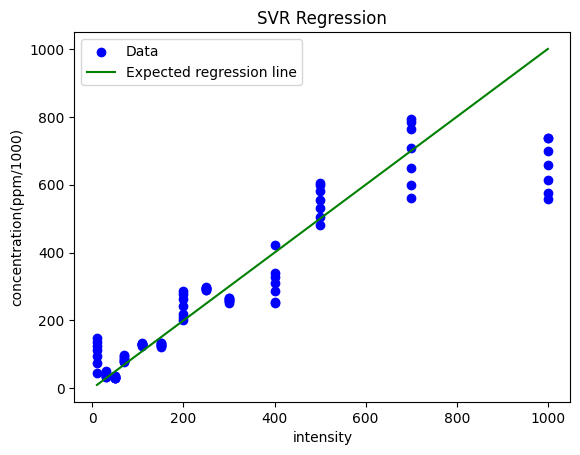

In [18]:


# Predict

# Plot the data points and regression line
plt.scatter(label2, Yp, color='blue', label='Data')

# Add labels and title
plt.xlabel('intensity')
plt.ylabel('concentration(ppm/1000)')
plt.title('SVR Regression')
plt.plot(Y, Y, '-g', label='Expected regression line')
# Add legend
plt.legend()

# Show the plot
plt.show()

